In [1]:
import sys
!{sys.executable} -m pip install opencv-python

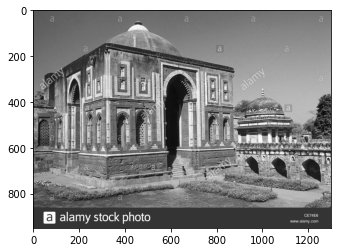

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "./train"

CATEGORIES = ["alai_darwaza","alai_minar","iron_pillar","qutub_minar","jamali_kamali_tomb"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [9]:
print(img_array.shape)

(950, 1300)


In [10]:
print(img_array)


[[ 83  81  81 ... 118 118 118]
 [ 95  91  88 ... 118 118 118]
 [ 95  91  86 ... 118 118 118]
 ...
 [ 53  53  53 ...  53  53  53]
 [ 53  53  53 ...  53  53  53]
 [ 53  53  53 ...  53  53  53]]


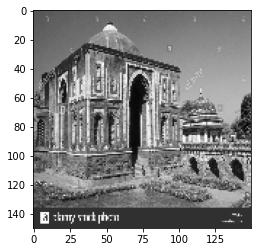

In [11]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [12]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████| 211/211 [00:10<00:00, 21.05it/s]

1286


In [13]:
training_data[0]

[array([[ 87,  90,  87, ..., 117, 116, 118],
        [ 89,  90,  90, ..., 120, 118, 123],
        [ 89,  87,  87, ..., 118, 119, 122],
        ...,
        [ 53,  53,  53, ...,  53,  53,  53],
        [ 53,  53,  53, ...,  53,  53,  53],
        [ 53,  53,  53, ...,  53,  53,  53]], dtype=uint8),
 0]

In [14]:
import random

random.shuffle(training_data)

In [15]:
for sample in training_data[:10]:
    print(sample[1])


2
3
3
4
1
4
1
4
1
3


In [16]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[131]
   [133]
   [134]
   ...
   [106]
   [106]
   [104]]

  [[133]
   [135]
   [135]
   ...
   [107]
   [107]
   [107]]

  [[131]
   [132]
   [132]
   ...
   [105]
   [108]
   [106]]

  ...

  [[102]
   [119]
   [130]
   ...
   [ 71]
   [ 90]
   [139]]

  [[133]
   [123]
   [ 64]
   ...
   [ 67]
   [ 70]
   [126]]

  [[103]
   [145]
   [ 98]
   ...
   [  4]
   [ 19]
   [ 57]]]]


In [17]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [18]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=16, epochs=3, validation_split=0.3)


ImportError: Traceback (most recent call last):
  File "c:\users\rahul\appdata\local\programs\python\python38-32\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 18, in swig_import_helper
    fp, pathname, description = imp.find_module('_pywrap_tensorflow', [dirname(__file__)])
  File "c:\users\rahul\appdata\local\programs\python\python38-32\lib\imp.py", line 296, in find_module
    raise ImportError(_ERR_MSG.format(name), name=name)
ImportError: No module named '_pywrap_tensorflow'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\rahul\appdata\local\programs\python\python38-32\lib\site-packages\tensorflow\python\__init__.py", line 66, in <module>
    from tensorflow.python import pywrap_tensorflow
  File "c:\users\rahul\appdata\local\programs\python\python38-32\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 28, in <module>
    _pywrap_tensorflow = swig_import_helper()
  File "c:\users\rahul\appdata\local\programs\python\python38-32\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 20, in swig_import_helper
    import _pywrap_tensorflow
ModuleNotFoundError: No module named '_pywrap_tensorflow'


Failed to load the native TensorFlow runtime.

See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/g3doc/get_started/os_setup.md#import_error

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

           # tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,batch_size=32,epochs=3,validation_split=0.3)
                     # callbacks=[tensorboard])

#model.save('64x3-CNN.model')

In [ ]:
import cv2
import tensorflow as tf

CATEGORIES = ["alai_minar", "qutub_minar"]  # will use this to convert prediction num to string value


def prepare(filepath):
    IMG_SIZE = 200  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.

In [ ]:
model = tf.keras.models.load_model("64x3-CNN.model")

In [ ]:
prediction = model.predict([prepare('447.jpg')])

In [ ]:
prediction

In [ ]:
print(CATEGORIES[int(prediction[0][0])])
